In [618]:
#!pip uninstall mne

!pip install -U mne # with -U means latest STABLE version!

%matplotlib qt

import os.path as op
import os
import numpy as np
import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy import linalg
from mne import io
from mne.connectivity import spectral_connectivity
from mne.datasets import sample
from mne.viz import plot_sensors_connectivity

#os.environ['ETS_TOOLKIT'] = 'qt4'
#os.environ['QT_API'] = 'pyqt5'

mne.sys_info()
# took out montage = depreciated in argument of below
#mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf", eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=None)
raw = mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf")
#r"C:\Users\lenovo\Documents\sample2.txt" 

raw.rename_channels(lambda s: s.split(' ')[1].split('-')[0])
#ch_names = ['fp1', 'fp2', 'f3', 'f4', 'c3', 'c4', 'p3', 'p4', 'o1', 'o2', 'f7', 'f8', 't3', 't4', 't5', 't6', 'fz', 'cz', 'pz']
#ch_names = ['fp1', 'fp2', 'f3', 'f4', 'c3', 'c4', 'p3', 'p4', 'o1', 'o2', 'f7', 'f8', 't3', 't4', 't5', 't6', 'fz', 'cz', 'pz']

#ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
#ch_names = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ']
#info = mne.create_info(ch_names=ch_names, sfreq=256, ch_types=ch_types)
#raw.info = info
#print(raw.info)



print(raw.info)



montage_kind = "standard_1020"
montage = mne.channels.make_standard_montage(montage_kind)
raw.set_montage(montage)

mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)




Platform:      Windows-10-10.0.18362-SP0
Python:        3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Executable:    C:\Users\barle\Anaconda3\python.exe
CPU:           Intel64 Family 6 Model 142 Stepping 12, GenuineIntel: 8 cores
Memory:        7.9 GB

mne:           0.21.0
numpy:         1.18.5 {blas=mkl_rt, lapack=mkl_rt}
scipy:         1.5.0
matplotlib:    3.2.2 {backend=Qt5Agg}

sklearn:       0.23.1
numba:         0.50.1
nibabel:       Not found
cupy:          Not found
pandas:        1.0.5
dipy:          Not found
mayavi:        Not found
pyvista:       Not found
vtk:           Not found
Extracting EDF parameters from C:\Users\barle\Downloads\AusEC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.1 Hz
 lowpass: 50.0 Hz
 meas_date: 2019-12-19 13:03:37 UTC


ERROR: Invalid requirement: '#'


(array([[3.35329398e-12, 2.61165780e-12, 1.84309637e-12, 2.11974460e-12,
         1.33298516e-12],
        [4.42408871e-12, 2.95996010e-12, 2.07069172e-12, 1.25670018e-12,
         1.00997699e-12],
        [4.31360333e-12, 3.69143746e-12, 2.06219781e-12, 2.72924731e-12,
         1.47400138e-12],
        [3.71869181e-12, 2.94488566e-12, 3.46686832e-12, 2.96327286e-12,
         5.69749080e-13],
        [6.68236708e-12, 1.08842077e-11, 1.68547545e-12, 3.60134166e-12,
         1.52477388e-12],
        [2.98609471e-12, 2.55064503e-12, 4.45870588e-12, 4.53913020e-12,
         2.56425780e-12],
        [5.68611003e-12, 1.06298055e-11, 2.56078819e-12, 3.50156267e-12,
         2.04222243e-12],
        [3.60114305e-12, 3.12224231e-12, 4.46744709e-12, 4.92667663e-12,
         2.43679043e-12],
        [3.10116093e-12, 1.80233505e-12, 5.22438157e-12, 1.62112064e-12,
         2.84948543e-12],
        [2.07149444e-12, 2.27897445e-12, 1.45112961e-11, 7.43933032e-12,
         2.07344903e-12],
        [2

In [ ]:
PSD Table

In [11]:

c3_freq_avg = mne.time_frequency.psd_welch(raw, fmin=8, fmax=15, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks="C3", proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)

#Converting array to list so can then index the list
c3_freq_avg_list = list(c3_freq_avg)
print(c3_freq_avg_list)
type(c3_freq_avg_list)

#indexing the list to only include the average frequencies in each 1Hz bin
c3_freq_avg_list2 = c3_freq_avg_list[0]
print(c3_freq_avg_list2)
c3_freq_avg_list3 = sum(sum(c3_freq_avg_list2)) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY

print(c3_freq_avg_list3)
print("The average alpha frequency for C3 is")
print(c3_freq_avg_list3/5)



#type(raw.ch_names) #IS A LIST
#for i in raw.ch_names
#    freq_avg = mne.time_frequency.psd_welch(raw, fmin=8, fmax=15, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=none, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)


list1 = mne.time_frequency.psd_welch(raw, fmin=8, fmax=15, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
print(list1)
print(list1[0])
list_two=list1[0]

#for i in list_two:
#    i=list(i)
#    j = sum(i) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY
#    for n in (raw.ch_names):
#        print(n)
#    print(j/5)
 

    

for i,n in zip(list_two, raw.ch_names):
    i=list(i)
    j = sum(i) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY
    print(n)
    print(j/5)
 



#df = pd.dataframe([
#    []
    
#]])

#sfreq=256
#mne.time_frequency.psd_array_multitaper(raw, sfreq, fmin=8, fmax=12, bandwidth=4, adaptive=False, low_bias=True, normalization='length', n_jobs=1, verbose=None)
#array1 = [6.68236708e-12, 1.08842077e-11, 1.68547545e-12, 3.60134166e-12,
#         1.52477388e-12]
#import statistics
#statistics.mean([6.68236708e-12, 1.08842077e-11, 1.68547545e-12, 3.60134166e-12, 1.52477388e-12])


Effective window size : 1.000 (s)
[array([[6.68236708e-12, 1.08842077e-11, 1.68547545e-12, 3.60134166e-12,
        1.52477388e-12, 3.52806707e-13, 6.54976025e-13, 9.54807848e-13]]), array([ 8.,  9., 10., 11., 12., 13., 14., 15.])]
[[6.68236708e-12 1.08842077e-11 1.68547545e-12 3.60134166e-12
  1.52477388e-12 3.52806707e-13 6.54976025e-13 9.54807848e-13]]
2.63407563137097e-11
The average alpha frequency for C3 is
5.26815126274194e-12
Effective window size : 1.000 (s)
(array([[3.35329398e-12, 2.61165780e-12, 1.84309637e-12, 2.11974460e-12,
        1.33298516e-12, 1.14558703e-12, 5.09945469e-13, 7.83492411e-13],
       [4.42408871e-12, 2.95996010e-12, 2.07069172e-12, 1.25670018e-12,
        1.00997699e-12, 1.17651632e-12, 7.06924777e-13, 5.19006725e-13],
       [4.31360333e-12, 3.69143746e-12, 2.06219781e-12, 2.72924731e-12,
        1.47400138e-12, 9.12402368e-13, 3.46467872e-13, 8.86215526e-13],
       [3.71869181e-12, 2.94488566e-12, 3.46686832e-12, 2.96327286e-12,
        5.69749080e-1

In [ ]:
Building For loop into Pandas Dataframe using just alpha frequency

In [118]:




k=1
list1 = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, tmin=0, tmax=3k, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
#print(list1)
#print(list1[0])
list_alpha=list1[0]


#tryingt to list out the frequencies for different times, create for loop that does 120

d = []
for i,n in zip(list_alpha, raw.ch_names):
    i=list(i)
    j = sum(i) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY
    d.append(
        {
            'condition': 'meditating',
            'time': 1,
            'channel_name': n,
            'avg_alpha_amplitude': j/5,
        }
    )

pd.DataFrame(d)



    #indexes of interest: 17=fz, 18=Cz, and 19 = Pz

SyntaxError: invalid syntax (<ipython-input-118-d1fb931431a2>, line 2)

In [ ]:
Building For loop into Pandas Dataframe using all frequencies and a single Time point 1-5 seconds

In [210]:


list1 = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
list_alpha=list1[0]

list2 = mne.time_frequency.psd_welch(raw, fmin=13, fmax=20, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
list_beta=list2[0]

list3 = mne.time_frequency.psd_welch(raw, fmin=21, fmax=30, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
list_hibeta=list3[0]

list4 = mne.time_frequency.psd_welch(raw, fmin=1, fmax=4, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
list_delta=list4[0]

list5 = mne.time_frequency.psd_welch(raw, fmin=5, fmax=8, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
list_theta=list5[0]

d = []
for d,t,a,b,h,n in zip(list_delta, list_theta, list_alpha, list_beta, list_hibeta, raw.ch_names):
    d=list(d)
    t=list(t)
    a=list(a)
    b=list(b)
    h=list(h)
    ja = sum(a) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY
    jb = sum(b)
    jc=sum(h)
    jd=sum(d)
    je=sum(t)
    d.append(
        {
            'condition': 'meditating',
            'time': 1,
            'channel_name': n,
            'avg_delta_amplitude_t1': jd/4,
            'avg_theta_amplitude_t1': je/4,  #IS MY INDEXING i.e. ZERO INDEXING CORRECT?!!?
            'avg_alpha_amplitude_t1': ja/5,
            'avg_beta_amplitude_t1': jb/8,
            'avg_hibeta_amplitude_t1': jc/10,
        }
    )

pd.DataFrame(d)
print(pd.DataFrame(d))





Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
                                                   0
0                                        1.04786e-11
1                                        1.65101e-12
2                                        2.78491e-12
3                                        2.08488e-12
4  {'condition': 'meditating', 'time': 1, 'channe...


In [ ]:
Creating Entropy Measures

In [619]:
data = raw.get_data()

sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([11, 30])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index1 = 1
channel_index2 = 2
raw_selection1 = data[channel_index1, start_sample:stop_sample]
raw_selection2 = data[channel_index2, start_sample:stop_sample]
#data = data.T



from entropy import *
import numpy as np
#np.random.seed(1234567)
#x = np.random.rand(3000)
print(perm_entropy(raw_selection1, order=3, normalize=True))                 # Permutation entropy
#print(perm_entropy(raw_selection2, order=3, normalize=True))
print(spectral_entropy(raw_selection1, 100, method='welch', normalize=True)) # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
print(svd_entropy(raw_selection1, order=3, delay=1, normalize=True))         # Singular value decomposition entropy
print(app_entropy(raw_selection1, order=2, metric='chebyshev'))              # Approximate entropy
print(sample_entropy(raw_selection1, order=2, metric='chebyshev'))           # Sample entropy
print(lziv_complexity(raw_selection1, normalize=True))        # Lempel-Ziv complexity
#np.random.seed(1234567)
#x = raw
#print(perm_entropy(raw, order=3, normalize=True))                 # Permutation entropy
#print(spectral_entropy(epochs, 20, normalize=True)) # Spectral entropy

print(petrosian_fd(raw_selection1))            # Petrosian fractal dimension
print(katz_fd(raw_selection1))                 # Katz fractal dimension
print(higuchi_fd(raw_selection1, kmax=10))     # Higuchi fractal dimension
print(detrended_fluctuation(raw_selection1))   # Detrended fluctuation analysis




#ENTROPY ANALYSES FROM NeuroKit
#import neurokit as nk


0.7332502442976125
0.5054572897564841
0.4382807819191983
0.6471928097903454
0.5869296777003166
0.005036154405198843
1.0080225617189333
2.5630655712172907
1.365461836580569
1.2369459469409727


In [ ]:
Splitting Raw Data into 3-Second Samples

In [355]:
#mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf", eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=None)
raw = mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf")


sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([11, 30])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index1 = 1
channel_index2 = 2
raw_selection1 = data[channel_index1, start_sample:stop_sample]
raw_selection2 = data[channel_index2, start_sample:stop_sample]
#data = data.T

#gld_close = pd.DataFrame(gld.Close)
raw_selection1df = pd.DataFrame(raw_selection1)
#gld_close['MA_9'] = gld_close.Close.rolling(9).mean().shift()
#gld_close['MA_9'] = gld_close.Close.rolling(9).mean().shift()
#gld_close['MA_21'] = gld_close.Close.rolling(21).mean()
print(raw_selection1df.head())

########raw_selection1df = raw_selection1df[0:767].mean() #Verified that this is indeed the list between entry 0 - 767
#raw_selection1df = raw_selection1df[1:768].mean()
#256 is Sampling Freq * 3 seconds = 768
print(raw_selection1df)

df = []
for s in raw_selection1df:
    raw_selection1df[0:767].mean()
    d.append(
        {
            'condition': 'meditating',
            #'time': raw_selection1df.index,
            #'channel_name': n,
            'mean samples': jd/4,
            'avg_theta_amplitude_t1': je/4,  #IS MY INDEXING i.e. ZERO INDEXING CORRECT?!!?
            'avg_alpha_amplitude_t1': ja/5,
            'avg_beta_amplitude_t1': jb/8,
            'avg_hibeta_amplitude_t1': jc/10,
        }
    )

pd.DataFrame(df)
print(pd.DataFrame(df))
'''

#d = []
df = []
#for d,t,a,b,h,n in zip(list_delta, list_theta, list_alpha, list_beta, list_hibeta, raw.ch_names):
for r,s in zip(raw_selection1, raw_selection2):
    d=list(d)
    t=list(t)
    a=list(a)
    b=list(b)
    h=list(h)
    ja = sum(a) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY
    jb = sum(b)
    jc=sum(h)
    jd=sum(d)
    je=sum(t)
    d.append(
        {
            'condition': 'meditating',
            'time': 1,
            'channel_name': n,
            'avg_delta_amplitude_t1': jd/4,
            'avg_theta_amplitude_t1': je/4,  #IS MY INDEXING i.e. ZERO INDEXING CORRECT?!!?
            'avg_alpha_amplitude_t1': ja/5,
            'avg_beta_amplitude_t1': jb/8,
            'avg_hibeta_amplitude_t1': jc/10,
        }
    )

pd.DataFrame(d)
print(pd.DataFrame(d))
'''



Extracting EDF parameters from C:\Users\barle\Downloads\AusEC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
          0
0 -0.000008
1 -0.000009
2 -0.000010
3 -0.000010
4 -0.000007
                 0
0    -7.850599e-06
1    -9.050690e-06
2    -1.025078e-05
3    -9.550729e-06
4    -6.650507e-06
...            ...
4859  4.500343e-07
4860 -1.350103e-06
4861 -2.450187e-06
4862 -2.750210e-06
4863 -2.450187e-06

[4864 rows x 1 columns]
Empty DataFrame
Columns: []
Index: []


"\n\n#d = []\ndf = []\n#for d,t,a,b,h,n in zip(list_delta, list_theta, list_alpha, list_beta, list_hibeta, raw.ch_names):\nfor r,s in zip(raw_selection1, raw_selection2):\n    d=list(d)\n    t=list(t)\n    a=list(a)\n    b=list(b)\n    h=list(h)\n    ja = sum(a) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY\n    jb = sum(b)\n    jc=sum(h)\n    jd=sum(d)\n    je=sum(t)\n    d.append(\n        {\n            'condition': 'meditating',\n            'time': 1,\n            'channel_name': n,\n            'avg_delta_amplitude_t1': jd/4,\n            'avg_theta_amplitude_t1': je/4,  #IS MY INDEXING i.e. ZERO INDEXING CORRECT?!!?\n            'avg_alpha_amplitude_t1': ja/5,\n            'avg_beta_amplitude_t1': jb/8,\n            'avg_hibeta_amplitude_t1': jc/10,\n        }\n    )\n\npd.DataFrame(d)\nprint(pd.DataFrame(d))\n"

In [ ]:
Creating Class Structure for File Segment

In [ ]:
class file_segment:
    def __init__(self, path, partitions, state_labels, element_length, dataframe):
        file_segment.path = path
        #r"C:\Users\lenovo\Documents\sample2.txt" 
        file_segment.state_labels = state_labels
        file_segment.element_length = element_length
        file_segment.dataframe = dataframe
        #file_segment.state_labels = state_labels
        
    def partition(start_seconds, stop_seconds, chan_ind1): #, chan_ind2, chan_ind3, chan_ind4, chan_ind5, chan_ind6):
        raw2 = mne.io.read_raw_edf(path)
        data = raw2.get_data()
        sampling_freq = raw.info['sfreq']
        start_stop_seconds = np.array([start_seconds, stop_seconds])
        start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
        channel_index1 = chan_ind1
        
        raw_selection1 = data[channel_index1, start_sample:stop_sample]
        '''channel_index2 = chan_ind2
        channel_index3 = chan_ind3
        channel_index4 = chan_ind4
        channel_index5 = chan_ind5
        channel_index6 = chan_ind6
        raw_selection1 = data[channel_index1, start_sample:stop_sample]
        raw_selection2 = data[channel_index2, start_sample:stop_sample]
        raw_selection3 = data[channel_index3, start_sample:stop_sample]
        raw_selection4 = data[channel_index4, start_sample:stop_sample]
        raw_selection5 = data[channel_index5, start_sample:stop_sample]
        raw_selection6 = data[channel_index6, start_sample:stop_sample]
    '''
    def create_df_samples():
        raw_selection1
       
meditation_recording1 = file_segment()
        
mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf", eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=None)
raw = mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf")
#r"C:\Users\lenovo\Documents\sample2.txt" 


In [ ]:
Trying to segment data in new ways / experimenting to do this in best ways

In [49]:
from entropy import *
import numpy as np

data = raw.get_data()

sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 362])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index1 = 1
channel_index2 = 2


raw_selection1 = data[channel_index1, start_sample:stop_sample]
raw_selection2 = data[channel_index2, start_sample:stop_sample]
#data = data.T

print(len(raw)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T[:,1])) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes


# getting rid of the extra samples so that the length of the recording is fully divisible by desired sample_width(in seconds) without remainders
target_seconds_per_sample = 3
sample_width = target_seconds_per_sample*raw.info['sfreq']
remainder = len(data.T[:,1])%sample_width
print(remainder)
final_num_samples = len(data.T[:,1]) - remainder 
print(final_num_samples)

#CORRECT **NEW** SAMPLE NUMBER  = final_num_samples / sample_width
num_of_new_samples = final_num_samples/sample_width
print(num_of_new_samples) # equals 120 which makes sense since 120*3 = 360 which is the amount of seconds in this recording!


#Creating the new data sample containing the RIGHT amounts of samples to be analysed - Oh but actually I could just iterate over the
# right amount of samples I wish to have instead of creating a new file!
#print(type(raw_selection1)) #This is a numpy array
#raw_selection_final_1 = raw_selection1[0:final_num_samples]
#print(len(raw_selection_final_1))



#for i, total_number_of_samples in enumerate(put array in here):
    


j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    #for j in range(int(sample_width)):
    sw = j+sample_width
    bin_iteration = raw_selection1[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    #print(len(bin_iteration))
    #print(len(raw_selection1))
    #print(raw_selection1[j:int(sw)])
    j += int(sample_width)
    avg = (total_samples_container)/(sample_width)
    #averages = avg(768raw_selection1[i] +768)
    #i += 1
#averages = avg(768i +768)
    ####print(avg)
    #print(perm_entropy(bin_iteration, order=3, normalize=True))
    #print(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)) # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
    print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))         # Singular value decomposition entropy
    #print(app_entropy(bin_iteration, order=2, metric='chebyshev'))              # Approximate entropy
    #print(sample_entropy(bin_iteration, order=2, metric='chebyshev'))           # Sample entropy
    #print(lziv_complexity(bin_iteration, normalize=True))        # Lempel-Ziv complexity
    #print(petrosian_fd(bin_iteration))            # Petrosian fractal dimension
    #print(katz_fd(bin_iteration))                 # Katz fractal dimension
    #print(higuchi_fd(bin_iteration, kmax=10))     # Higuchi fractal dimension
    #print(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
    #print(total_samples_container)
    total_samples_container = 0
    
    

'''


i=0
#total_samples_container = 0
for i in range(int(final_num_samples)):         
    total_samples_container += raw_selection1[i]
    i += 1
print(sum(total_samples_container)/sample_width)



for i in data.T[:,1]))
print(sum(data.T[:,1]))



for x in range(len(data.T[:,1])):
    i=0
    total512 = 0
    for i in range(512):     #this equals 30-11seconds *265 (fs) !
        total512 += raw_selection1[i]
        i += 1
print(total512/512)




for j in range()

for x in range(len(data.T[:,1])):
    i=0
    total512 = 0
    for i in range(512):     #this equals 30-11seconds *265 (fs) !
        total512 += raw_selection1[i]
        i += 1
print(total512/512)


# THIS WOULD BE A SEGMENTATION DONE AFTER A SEGMENT IS PROVIDED WHICH IS FULLY MEDITATION/GIVEN STATE OR NOT MEDITATION/GIVEN STATE
df = []
for s in raw_selection1df:
    raw_selection1df[0:767].mean()
    d.append(
        {
            'condition': 'meditating',
            #'time': raw_selection1df.index,
            #'channel_name': n,
            'mean samples': jd/4,
            'avg_theta_amplitude_t1': je/4,  #IS MY INDEXING i.e. ZERO INDEXING CORRECT?!!?
            'avg_alpha_amplitude_t1': ja/5,
            'avg_beta_amplitude_t1': jb/8,
            'avg_hibeta_amplitude_t1': jc/10,
        }
    )

pd.DataFrame(df)
print(pd.DataFrame(df))

for i j in 
start_stop_seconds = np.array([11, 30])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index1 = 1
channel_index2 = 2
raw_selection1 = data[channel_index1, start_sample:stop_sample]
raw_selection2 = data[channel_index2, start_sample:stop_sample]
#data = data.T
'''

92672
92672
92672
512.0
92160.0
120.0
0.33200139897208053
0.3292256228301827
0.5009658524072548
0.4724386203299358
0.48319645775239467
0.39904702633777556
0.4066480360514334
0.4697182516476239
0.43408817277803685
0.469653495872788
0.467635108323177
0.35153520548616796
0.39468495785306035
0.41628903145478585
0.4099237133247481
0.44190085110458704
0.41591315433950576
0.37755985021362864
0.44918785837936415
0.43062704791964396
0.4071657540815013
0.34489398197781
0.23499614934565274
0.3321588030414122
0.5099986016648829
0.3461667207613032
0.2885611545267696
0.40194681754149403
0.3204671538651623
0.4337743191648685
0.4435225102116314
0.4048884979485736
0.42335875695707614
0.38402025887142544
0.406367548849186
0.4303755893986438
0.3573335365605075
0.42374127143645035
0.4605357925497936
0.49386478876457773
0.49459720831874265
0.45079613113753425
0.5034532767732437
0.4739269103286362
0.4473603827566027
0.3742196959822342
0.372673977621339
0.39527678248977277
0.4364565796425708
0.36132424165689

"\n\n\ni=0\n#total_samples_container = 0\nfor i in range(int(final_num_samples)):         \n    total_samples_container += raw_selection1[i]\n    i += 1\nprint(sum(total_samples_container)/sample_width)\n\n\n\nfor i in data.T[:,1]))\nprint(sum(data.T[:,1]))\n\n\n\nfor x in range(len(data.T[:,1])):\n    i=0\n    total512 = 0\n    for i in range(512):     #this equals 30-11seconds *265 (fs) !\n        total512 += raw_selection1[i]\n        i += 1\nprint(total512/512)\n\n\n\n\nfor j in range()\n\nfor x in range(len(data.T[:,1])):\n    i=0\n    total512 = 0\n    for i in range(512):     #this equals 30-11seconds *265 (fs) !\n        total512 += raw_selection1[i]\n        i += 1\nprint(total512/512)\n\n\n# THIS WOULD BE A SEGMENTATION DONE AFTER A SEGMENT IS PROVIDED WHICH IS FULLY MEDITATION/GIVEN STATE OR NOT MEDITATION/GIVEN STATE\ndf = []\nfor s in raw_selection1df:\n    raw_selection1df[0:767].mean()\n    d.append(\n        {\n            'condition': 'meditating',\n            #'time'

In [134]:
#Creating Dataframe from loop

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG Fp2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.1 Hz
 lowpass: 50.0 Hz
 meas_date: 2019-12-19 13:03:37 UTC
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>


In [633]:
from entropy import *
import numpy as np

data = raw.get_data()

sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 362])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index1 = 5
channel_index2 = 2
raw_selection1 = data[channel_index1, start_sample:stop_sample]
raw_selection2 = data[channel_index2, start_sample:stop_sample]
#data = data.T


print(len(raw)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T[:,1])) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes


# getting rid of the extra samples so that the length of the recording is fully divisible by desired sample_width(in seconds) without remainders
target_seconds_per_sample = 3
sample_width = target_seconds_per_sample*raw.info['sfreq']
remainder = len(data.T[:,1])%sample_width
print(remainder)
final_num_samples = len(data.T[:,1]) - remainder 
print(final_num_samples)

#CORRECT **NEW** SAMPLE NUMBER  = final_num_samples / sample_width
num_of_new_samples = final_num_samples/sample_width


d = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection1[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    d.append(
        {
            'condition': 'meditating',
            'time': 1,
            #'alpha_amp': list1,
            'channel_name': b,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
pd.DataFrame(d)
print(pd.DataFrame(d))
   

'''

k=1
for k in range(int(120)):
    list1 = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    list_alpha=list1[0]
    #print(list1)
    #print(list1[0])
    print(list_alpha)




d = []
for k,n in zip(list_alpha, raw.ch_names):
    k=list(k)
    o = sum(k) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY
    d.append(
        {
            'condition': 'meditating',
            'time': 1,
            'channel_name': n,
            'avg_alpha_amplitude': o/5,
        }
    )

pd.DataFrame(d)



j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    #for j in range(int(sample_width)):
    sw = j+sample_width
    bin_iteration = raw_selection1[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    #print(len(bin_iteration))
    #print(len(raw_selection1))
    #print(raw_selection1[j:int(sw)])
    j += int(sample_width)
    avg = (total_samples_container)/(sample_width)
    #averages = avg(768raw_selection1[i] +768)
    #i += 1
#averages = avg(768i +768)
    ####print(avg)
    #print(perm_entropy(bin_iteration, order=3, normalize=True))
    #print(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)) # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
    print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))         # Singular value decomposition entropy
    #print(app_entropy(bin_iteration, order=2, metric='chebyshev'))              # Approximate entropy
    #print(sample_entropy(bin_iteration, order=2, metric='chebyshev'))           # Sample entropy
    #print(lziv_complexity(bin_iteration, normalize=True))        # Lempel-Ziv complexity
    #print(petrosian_fd(bin_iteration))            # Petrosian fractal dimension
    #print(katz_fd(bin_iteration))                 # Katz fractal dimension
    #print(higuchi_fd(bin_iteration, kmax=10))     # Higuchi fractal dimension
    #print(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
    #print(total_samples_container)
    
    total_samples_container = 0
    '''


92672
92672
92672
512.0
92160.0
      condition  time                                       channel_name  \
0    meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
1    meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
2    meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
3    meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
4    meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
..          ...   ...                                                ...   
115  meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
116  meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
117  meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
118  meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   
119  meditating     1  [1.2060336521372777e-12, 8.923736273869477e-13...   

     svd_entropy  perm_entropy  spec_entropy  app_entro

"\n\nk=1\nfor k in range(int(120)):\n    list1 = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)\n    list_alpha=list1[0]\n    #print(list1)\n    #print(list1[0])\n    print(list_alpha)\n\n\n\n\nd = []\nfor k,n in zip(list_alpha, raw.ch_names):\n    k=list(k)\n    o = sum(k) #WHY DID I HAVE TO ADD ANOTHER SUM COMMAND HERE? I KNOW I DID HAVE TO BUT NOT SURE WHY\n    d.append(\n        {\n            'condition': 'meditating',\n            'time': 1,\n            'channel_name': n,\n            'avg_alpha_amplitude': o/5,\n        }\n    )\n\npd.DataFrame(d)\n\n\n\nj=0\ntotal_samples_container = 0\nfor i in range(int(num_of_new_samples)):\n    #for j in range(int(sample_width)):\n    sw = j+sample_width\n    bin_iteration = raw_selection1[j:int(sw)]\n    total_samples_container += sum(bin_iteration)\n    #print(len(bin_iteration))\n    #print(

In [ ]:
Trying to Create a new file for iterations to work to do FFT - but not working

In [ ]:
print(raw.ch_names)
# Generate some random data
data = [1,2,3,4]

#print(raw.ch_types)
# Initialize an info structure
info = mne.create_info(
    ch_names=['EEG Fp1-LE', 'EEG Fp2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG Fz-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1'],
    #ch_types= ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg'],
    sfreq=256
)
custom_raw = mne.io.RawArray(raw, info)
print(custom_raw)
 #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[0]


In [ ]:
CREATING 7 SETS OF LOOPS FOR DATAFRAME CONTAINING BOTH MEDITATION AND NON-MEDITATION DATA*****

In [741]:

from entropy import *
import numpy as np

data = raw.get_data()

raw1 = raw.copy().crop(0, 181)
data1 = raw1.get_data()
raw2 = raw.copy().crop(181, 361)
data2 = raw2.get_data()

######
sampling_freq = raw.info['sfreq']
start_stop_seconds1 = np.array([0, 181])
start_stop_seconds2 = np.array([180, 361])
start_sample1, stop_sample1 = (start_stop_seconds1 * sampling_freq).astype(int)
#start_sample2, stop_sample2 = (start_stop_seconds2 * sampling_freq).astype(int)
channel_index1 = 5
channel_index2 = 5
raw_selection1 = data1[channel_index1, start_sample1:stop_sample1]
raw_selection2 = data2[channel_index2, start_sample1:stop_sample1]
#data = data.T


print(len(raw)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T[:,1])) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes


# getting rid of the extra samples so that the length of the recording is fully divisible by desired sample_width(in seconds) without remainders
target_seconds_per_sample = 3
sample_width = target_seconds_per_sample*raw.info['sfreq']
remainder = len(data.T[:,1])%sample_width
print(remainder)
final_num_samples = len(data.T[:,1]) - remainder 
print(final_num_samples)

#CORRECT **NEW** SAMPLE NUMBER  = final_num_samples / sample_width
num_of_new_samples = final_num_samples/sample_width

#####


'''
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 362])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index1 = 5
channel_index2 = 2
raw_selection1 = data[channel_index1, start_sample:stop_sample]
raw_selection2 = data[channel_index2, start_sample:stop_sample]



#INDICIES FOR CHANNELS: 5=C3, 6=C4,7=P3,  8=P4, Fz=17, Cz=18, Pz=19

sampling_freq = raw.info['sfreq']
start_stop_seconds1 = np.array([0, 181])
start_stop_seconds2 = np.array([181, 362])
start_sample1, stop_sample1 = (start_stop_seconds1 * sampling_freq).astype(int)
#start_sample2, stop_sample2 = (start_stop_seconds2 * sampling_freq).astype(int)
channel_index1 = 5
channel_index2 = 5
channel_index3 = 6
channel_index4 = 6
channel_index5 = 7
channel_index6 = 7
channel_index7 = 8
channel_index8 = 8
channel_index9 = 17
channel_index10 = 17
channel_index11= 18
channel_index12 = 18
channel_index13 = 19
channel_index14 = 19
raw_selection1 = data[channel_index1, start_sample1:stop_sample1]
raw_selection2 = data[channel_index2, start_sample2:stop_sample2]
raw_selection3 = data[channel_index3, start_sample1:stop_sample1]
raw_selection4 = data[channel_index4, start_sample2:stop_sample2]
raw_selection5 = data[channel_index5, start_sample1:stop_sample1]
raw_selection6 = data[channel_index6, start_sample2:stop_sample2]
raw_selection7 = data[channel_index7, start_sample1:stop_sample1]
raw_selection8 = data[channel_index8, start_sample2:stop_sample2]
raw_selection9 = data[channel_index9, start_sample1:stop_sample1]
raw_selection10 = data[channel_index10, start_sample2:stop_sample2]
raw_selection11 = data[channel_index11, start_sample1:stop_sample1]
raw_selection12 = data[channel_index12, start_sample2:stop_sample2]
raw_selection13 = data[channel_index13, start_sample1:stop_sample1]
raw_selection14 = data[channel_index14, start_sample2:stop_sample2]
#print(raw_selection1.T)

print(len(raw)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
print(len(data.T[:,1])) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes


# getting rid of the extra samples so that the length of the recording is fully divisible by desired sample_width(in seconds) without remainders
target_seconds_per_sample = 3
sample_width = target_seconds_per_sample*raw.info['sfreq']
remainder = len(data.T[:,1])%sample_width
print(remainder)
final_num_samples = len(data.T[:,1]) - remainder 
print(final_num_samples)

#CORRECT **NEW** SAMPLE NUMBER  = final_num_samples / sample_width
num_of_new_samples = final_num_samples/sample_width
'''

#*********************************************************************C3*********************************************************************
nc3 = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection1[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    nc3.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 5,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
nc3 = pd.DataFrame(nc3)
#print(pd.DataFrame(nc3))
        


mc3 = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection2[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mc3.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 5,
            #'avg_alpha_amplitude': o/5,
            #'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mc3 = pd.DataFrame(mc3)
#print(pd.DataFrame(mc3))









# Concatenate the dataframes into one
combined_dataframe = pd.concat([nc3, mc3])
#combined_dataframe = pd.concat([nc3, mc3])
print(combined_dataframe.tail())


#combined_dataframe.to_csv(r"C:\Users\barle\Downloads/combined_df.csv", index = False)


92672
92672
92672
512.0
92160.0


ValueError: Error: order * delay should be lower than x.size

In [751]:
!pip install -U mne # with -U means latest STABLE version!
%matplotlib qt
import os.path as op
import os
import numpy as np
import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy import linalg
from mne import io
from mne.connectivity import spectral_connectivity
from mne.datasets import sample
from mne.viz import plot_sensors_connectivity
from entropy import *
import numpy as np

mne.sys_info()
# took out montage = depreciated in argument of below
#mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf", eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=None)
raw = mne.io.read_raw_edf(r"C:\Users\barle\Downloads/AusEC.edf")
#r"C:\Users\lenovo\Documents\sample2.txt" 
raw.rename_channels(lambda s: s.split(' ')[1].split('-')[0])
print(raw.info)
montage_kind = "standard_1020"
montage = mne.channels.make_standard_montage(montage_kind)
raw.set_montage(montage)
mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, tmin=0, tmax=5, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)


data = raw.get_data()


#INDICIES FOR CHANNELS: 5=C3, 6=C4,7=P3,  8=P4, Fz=17, Cz=18, Pz=19

sampling_freq = raw.info['sfreq']
start_stop_seconds1 = np.array([0, (len(raw) / raw.info['sfreq'])])
start_stop_seconds2 = np.array([(len(raw) / raw.info['sfreq']), 719])
start_sample1, stop_sample1 = (start_stop_seconds1 * sampling_freq).astype(int)
start_sample2, stop_sample2 = (start_stop_seconds2 * sampling_freq).astype(int)
channel_index1 = 1
channel_index2 = 2
channel_index3 = 3
channel_index4 = 4
channel_index5 = 5
channel_index6 = 6
channel_index7 = 7
channel_index8 = 8
channel_index9 = 9
channel_index10 = 10
channel_index11= 11
channel_index12 = 12
channel_index13 = 13
channel_index14 = 14
raw_selection1 = data[channel_index1, start_sample1:stop_sample1]
raw_selection2 = data[channel_index2, start_sample1:stop_sample2]
raw_selection3 = data[channel_index3, start_sample1:stop_sample1]
raw_selection4 = data[channel_index4, start_sample1:stop_sample2]
raw_selection5 = data[channel_index5, start_sample1:stop_sample1]
raw_selection6 = data[channel_index6, start_sample1:stop_sample2]
raw_selection7 = data[channel_index7, start_sample1:stop_sample1]
raw_selection8 = data[channel_index8, start_sample1:stop_sample2]
raw_selection9 = data[channel_index9, start_sample1:stop_sample1]
raw_selection10 = data[channel_index10, start_sample1:stop_sample2]
raw_selection11 = data[channel_index11, start_sample1:stop_sample1]
raw_selection12 = data[channel_index12, start_sample1:stop_sample2]
raw_selection13 = data[channel_index13, start_sample1:stop_sample1]
raw_selection14 = data[channel_index14, start_sample1:stop_sample2]
#print(raw_selection1.T)

#print(len(raw)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
#print(len(data.T)) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes
#print(len(data.T[:,1])) # = 92672 / 256 = 362 seconds total / 60  = 6 minutes


target_seconds_per_sample = 3
sample_width = target_seconds_per_sample*raw.info['sfreq']
remainder = len(data.T[:,1])%sample_width
print(remainder)
final_num_samples = len(data.T[:,1]) - remainder 
print(final_num_samples)

#CORRECT **NEW** SAMPLE NUMBER  = final_num_samples / sample_width
num_of_new_samples = final_num_samples/sample_width

#*********************************************************************C3*********************************************************************
nc3 = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection1[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    nc3.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 5,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
nc3 = pd.DataFrame(nc3)
#print(pd.DataFrame(nc3))
        


mc3 = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection2[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mc3.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 5,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mc3 = pd.DataFrame(mc3)
#print(pd.DataFrame(mc3))




#*********************************************************************C4*********************************************************************



nc4 = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection3[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    nc4.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 6,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
nc4=pd.DataFrame(nc4)
#print(pd.DataFrame(np3))
        


mc4 = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection4[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mc4.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 6,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mc4=pd.DataFrame(mc4)
#print(pd.DataFrame(mp3))





#*********************************************************************P3*********************************************************************

np3 = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection5[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    np3.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 7,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
np3=pd.DataFrame(np3)
#print(pd.DataFrame(np3))
        


mp3 = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection6[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mp3.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 7,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mp3=pd.DataFrame(mp3)
#print(pd.DataFrame(mp3))



#*********************************************************************P4*********************************************************************

np4 = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection7[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    np4.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 8,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
np4=pd.DataFrame(np4)
#print(pd.DataFrame(np4))
        


mp4 = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection8[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mp4.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 8,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mp4=pd.DataFrame(mp4)
#print(pd.DataFrame(mp4))






#*********************************************************************FZ*********************************************************************

nfz = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection9[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    nfz.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 17,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
nfz=pd.DataFrame(nfz)
#print(pd.DataFrame(nfz))
        


mfz = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection10[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mfz.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 17,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mfz=pd.DataFrame(mfz)
#print(pd.DataFrame(mfz))






#*********************************************************************CZ*********************************************************************

ncz = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection11[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    ncz.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 18,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
ncz=pd.DataFrame(ncz)
#print(pd.DataFrame(ncz))
        


mcz = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection12[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mcz.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 18,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mcz=pd.DataFrame(mcz)
#print(pd.DataFrame(mcz))






#*********************************************************************FZ*********************************************************************

npz = []
j=0
total_samples_container = 0
for i in range(int(num_of_new_samples)):
    sw = j+sample_width
    bin_iteration = raw_selection13[j:int(sw)]
    total_samples_container += sum(bin_iteration)
    j += int(sample_width)
    #custom_raw = mne.io.RawArray(bin_iteration, info)
    #print(custom_raw)
    #list1 = mne.time_frequency.psd_welch(raw_selection1, fmin=8, fmax=12, tmin=0, tmax=3, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
    #list_alpha=list1[1,1]
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    npz.append(
        {
            'condition': 0,
            'time': 3*i,
            #'alpha_amp': list1,
            'channel_index': 19,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
            
        }
    )

    total_samples_container = 0
npz=pd.DataFrame(npz)
#print(pd.DataFrame(npz))
        


mpz = []
p=0
z=0
total_samples_container = 0          
for f in range(int(num_of_new_samples)):
    sw = p+sample_width
    bin_iteration = raw_selection14[p:int(sw)]
    total_samples_container += sum(bin_iteration)
    p += int(sample_width)
    #print(svd_entropy(bin_iteration, order=3, delay=1, normalize=True))
    mpz.append(
        {
            'condition': 1,
            'time': 3*f+360,
            'channel_index': 19,
            #'avg_alpha_amplitude': o/5,
            'svd_entropy': (svd_entropy(bin_iteration, order=3, delay=1, normalize=True)),
            'perm_entropy': (perm_entropy(bin_iteration, order=3, normalize=True)),
            'spec_entropy':(spectral_entropy(bin_iteration, 100, method='welch', normalize=True)), # Spectral entropy CANNOT USE RAW - MUST USE RAW SELECTION FOR SOME REASON!!!!
            'app_entropy':(app_entropy(bin_iteration, order=2, metric='chebyshev')),              # Approximate entropy
            'sample_entropy':(sample_entropy(bin_iteration, order=2, metric='chebyshev')),           # Sample entropy
            'lziv_complexity':(lziv_complexity(bin_iteration, normalize=True)),        # Lempel-Ziv complexity
            'petrosian_fd':(petrosian_fd(bin_iteration)),            # Petrosian fractal dimension
            'katz_fd':(katz_fd(bin_iteration)),                 # Katz fractal dimension
            'higuchi_fd':(higuchi_fd(bin_iteration, kmax=10)),     # Higuchi fractal dimension
            'detrended_fluctuation':(detrended_fluctuation(bin_iteration))   # Detrended fluctuation analysis
        }
    )

    total_samples_container = 0
mpz=pd.DataFrame(mpz)
#print(pd.DataFrame(mpz))

# Concatenate the dataframes into one
combined_dataframe = pd.concat([nc3, mc3, nc4, mc4, np3, mp3, np4, mp4, nfz, mfz, ncz, mcz, npz, mpz])
#combined_dataframe = pd.concat([nc3, mc3])
print(combined_dataframe.tail())

#combined_dataframe.to_csv(r"C:\Users\barle\Downloads/combined_df.csv", index = False)

#INDICIES FOR CHANNELS: 5=C3, 6=C4,7=P3,  8=P4, Fz=17, Cz=18, Pz=19


Platform:      Windows-10-10.0.18362-SP0
Python:        3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Executable:    C:\Users\barle\Anaconda3\python.exe
CPU:           Intel64 Family 6 Model 142 Stepping 12, GenuineIntel: 8 cores
Memory:        7.9 GB

mne:           0.21.0
numpy:         1.18.5 {blas=mkl_rt, lapack=mkl_rt}
scipy:         1.5.0
matplotlib:    3.2.2 {backend=Qt5Agg}

sklearn:       0.23.1
numba:         0.50.1
nibabel:       Not found
cupy:          Not found
pandas:        1.0.5
dipy:          Not found
mayavi:        Not found
pyvista:       Not found
vtk:           Not found
Extracting EDF parameters from C:\Users\barle\Downloads\AusEC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.1 Hz
 lowpass: 50.0 Hz
 meas_date: 2019-12-19 13:03:37 UTC


ERROR: Invalid requirement: '#'


512.0
92160.0
     condition  time  channel_index  svd_entropy  perm_entropy  spec_entropy  \
115          1   705             19     0.574699      0.703341      0.599112   
116          1   708             19     0.600115      0.730093      0.687049   
117          1   711             19     0.553482      0.706054      0.571280   
118          1   714             19     0.475706      0.676901      0.452676   
119          1   717             19     0.512836      0.680912      0.533315   

     app_entropy  sample_entropy  lziv_complexity  petrosian_fd   katz_fd  \
115     0.706141        0.702158         0.024961      1.009209  2.561136   
116     0.763641        0.779862         0.024961      1.010408  2.602496   
117     0.694920        0.706026         0.024961      1.009209  2.382781   
118     0.619308        0.595557         0.024961      1.008079  2.247074   
119     0.650652        0.624863         0.024961      1.008079  2.217611   

     higuchi_fd  detrended_fluctuation  
1

In [ ]:
FFT TAble ATTEMPT

In [ ]:
from entropy import *
import numpy as np

data = raw.get_data()

sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 362])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index1 = 1
channel_index2 = 2
raw_selection1 = data[channel_index1, start_sample:stop_sample]
raw_selection2 = data[channel_index2, start_sample:stop_sample]

#mne.time_frequency.psd_array_multitaper(raw, sfreq, fmin=0, fmax=inf, bandwidth=None, adaptive=False, low_bias=True, normalization='length', n_jobs=1, verbose=None)
psds, freqs = mne.time_frequency.psd_array_multitaper(raw_selection1, sfreq=256, fmin=1, fmax=20, bandwidth=3, adaptive=False, low_bias=True, normalization='length', n_jobs=1, verbose=None)
print(psds, freq)



#list1 = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, tmin=0, tmax=100, n_fft=256, n_overlap=0, n_per_seg=3, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', verbose=None)
#print(list1)
#print(list1[0])

#raw_selection2 = data[channel_index2, start_sample:stop_sample2]
#data = data.T

#m = []
#p=0
#z=0
#total_samples_container = 0
#for s,y in zip(list1[0], raw.ch_names):
#for y in raw.ch_names[0]:
#for t in range(len(raw.ch_names)):
   # ch_name = raw.ch_names
   # m.append(
    #    {
    #    'channel_name': raw.ch_names[t]
    #    }
        


In [ ]:
K Means Clustering  #PART 1 

       Dim. #1   Dim. #2  cluster_labels
0     0.972515  0.383871               2
1     0.998783  0.403375               2
2     0.845366  0.464395               1
3     0.988649  0.390884               2
4     0.995185  0.404767               2
...        ...       ...             ...
1675  0.155842  0.502417               1
1676  0.135423  0.498160               1
1677  0.133178  0.501274               1
1678  0.040961  0.482194               1
1679  0.051367  0.478811               1

[1680 rows x 3 columns]


KeyError: "None of [Int64Index([ 288,  289,  290,  291,  292,  293,  294,  295,  296,  297,\n            ...\n            1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679],\n           dtype='int64', length=1344)] are in the [index]"

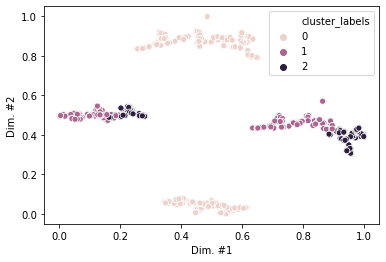

In [365]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler



dataset = combined_dataframe

#X = sklearn.preprocessing.normalize(dataset, norm='l2', axis=1, copy=True, return_norm=False)

'''
#To divide the data into attributes and labels
#X = dataset.drop(['channel_index', 'time'], axis=1)
X = dataset.drop(['time', 'condition'], axis=1)
print(X)
print(X.shape)
y = dataset['condition']
#At this point of time X variable contains attributes while y variable contains corresponding labels.

print(dataset.columns)




#plt.scatter(X.iloc[:,5:6],X.iloc[:,5:6], label='channel_index')
'''
dataset = combined_dataframe

data = dataset.drop(['time','condition'], axis=1)
#X = dataset.drop(['time', 'condition'], axis=1)
#print(X)
#print(X.shape)
labels = dataset['condition']



#-------------------------------------------------------------



data_for_scaling = dataset.values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_scaling)


''' let's forget we have labels for a bit and pretend we have to cluster our data 
We will use sci-kit learn's agglomerative clustering package 
'''

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)

cluster_labels = model.fit_predict(scaled_data)



''' first, I will reduce dimensions with UMAP so we look at things on a 2-D plane 
(much easier for humans to visualize) '''
#!pip install umap-learn
import umap ###install with "pip install umap-learn"
data_reducer = umap.UMAP()
umap_data = data_reducer.fit_transform(scaled_data)


scaled_umap_data = scaler.fit_transform(umap_data)


''' add back to a dataframe because it's easier to keep track of things that way 
(all indices and columns have names that we can reference)'''

reduced_dataset = pd.DataFrame(scaled_umap_data,columns=['Dim. #1', 'Dim. #2'])

''' add in our clustering labels from hierarchical clustering '''
reduced_dataset['cluster_labels'] = cluster_labels
print(reduced_dataset)



import seaborn as sns
sns.scatterplot(x='Dim. #1', y='Dim. #2',
            hue='cluster_labels', data=reduced_dataset)




''' ----------- Now, since we actually do have labels, we are going to try and predict! '''
 
''' ------------ To do this, we will use a Random Forest Classifier ----------- '''

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
rf_model = RandomForestClassifier(n_estimators = 64)


''' We will split our dataset into 5 parts, and each part will get a turn being the test dataset
this is called cross-validation, and it helps ensure our conclusions are generalizable '''


''' Stratified K-Fold will randomly and automatically generate n_splits (in this case 5) random partitions of the data for cross valitdation '''
skf = StratifiedKFold(n_splits=5)

''' Stratfied KFold breaks down the data array (generated using values) and the label array for analysis '''

accuracy = 0


''' Each test set will have slightly different feature importances so we will 
sum the results for each feature using an array'''
all_feature_importances = np.zeros(len(data.columns))

''' we need to keep track of the labels from all our random test sets so we can make a
confusion matrix '''
all_labels = []

''' we need to keep track of the predictions from all our random test sets so we can make a
confusion matrix '''
all_predictions = []

for train_index, test_index in skf.split(data, labels):
    
        ''' training dataset '''
        X_train, y_train = data.values[train_index], labels[train_index]

        ''' testing dataset '''
        X_test, y_test = data.values[test_index], labels[test_index]

        rf_model.fit(X_train,y_train)
        
        ''' add the new feature importances to the current FI vlues'''
        all_feature_importances += rf_model.feature_importances_
        
        predictions = rf_model.predict(X_test)
        
        ''' Use extend function to add the new predictions onto thelist of predictions'''
        all_predictions.extend(predictions)
        
        ''' Use extend function to add the new labels onto the list of labels'''
        all_labels.extend(y_test)
'''        
        accuracy += accuracy_score(predictions,y_test)

print(accuracy/5)
print()
print('ALL LABELS')
print(all_labels)
print()
print('ALL PREDICTIONS')
print(all_predictions)

'''


In [ ]:
SVM Machine Learning

In [289]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
#print(combined_dataframe.shape)
#data.T[:,1]

#dataset = pd.read_csv('D:\Datasets\petrol_consumption.csv')
#dataset.head()
dataset = combined_dataframe



#To divide the data into attributes and labels
#X = dataset.drop(['channel_index', 'time'], axis=1)
X = dataset.drop(['time', 'condition'], axis=1)
print(X)
print(X.shape)
y = dataset['condition']
#At this point of time X variable contains attributes while y variable contains corresponding labels.

#ADDED THIS
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X) # where X is your data to be scaled
#Xtrain = scaler.transform(X)
#print(Xtrain)
from sklearn.preprocessing import Normalizer
X = sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)


#Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets.
#Luckily, the model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to seamlessly divide
#data into training and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


#the fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method.
#Execute the following code to train the algorithm:

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#To make predictions, the predict method of the SVC class is used. Take a look at the following code:

y_pred = svclassifier.predict(X_test)


#Evaluating the Algorithm
#Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics
#library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important
#metrics.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



     channel_index  svd_entropy  perm_entropy  spec_entropy  app_entropy  \
0                5     0.552659      0.721052      0.623659     0.713188   
1                5     0.579952      0.706401      0.643453     0.710999   
2                5     0.558373      0.691801      0.575891     0.667097   
3                5     0.559967      0.715732      0.626278     0.708718   
4                5     0.563196      0.722683      0.618252     0.699910   
..             ...          ...           ...           ...          ...   
115             19     0.586981      0.698074      0.574114     0.668276   
116             19     0.540986      0.684431      0.589356     0.659651   
117             19     0.531284      0.690896      0.539640     0.668054   
118             19     0.480778      0.673220      0.517640     0.621531   
119             19     0.496567      0.652779      0.535398     0.640017   

     sample_entropy  lziv_complexity  petrosian_fd   katz_fd  higuchi_fd  \
0          

C:\Users\barle\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Random Forest Machine Learning + SVM from the tutorial from ML Class

Mean Absolute Error: 0.366547619047619
Mean Squared Error: 0.1924238095238095
Root Mean Squared Error: 0.43866138367060475
[[112  68]
 [ 36 120]]
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       180
           1       0.64      0.77      0.70       156

    accuracy                           0.69       336
   macro avg       0.70      0.70      0.69       336
weighted avg       0.70      0.69      0.69       336

0.6904761904761905
0.5398809523809524

ALL LABELS
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

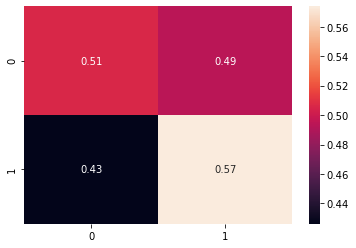

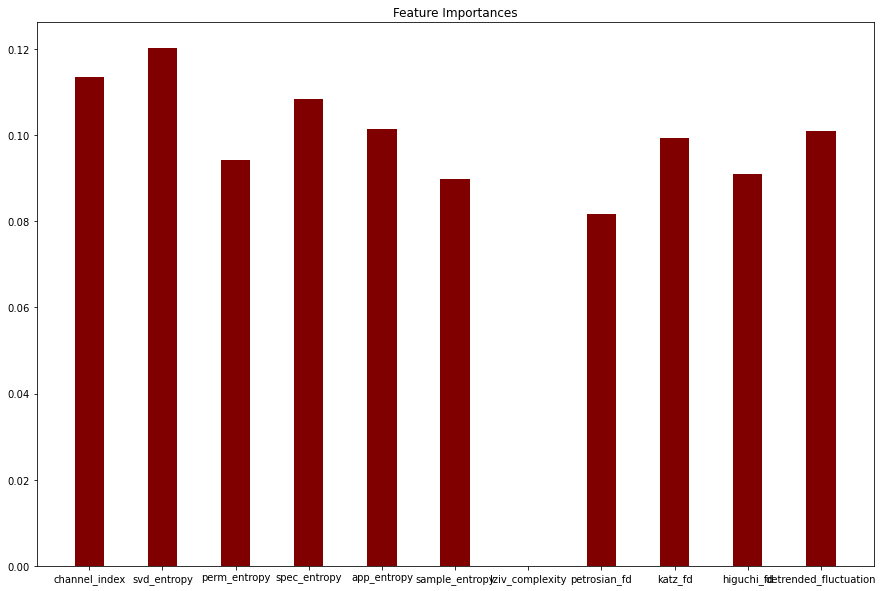

In [752]:


#https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import umap ###install with "pip install umap-learn"
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns ### install using pip install seaborn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

dataset = combined_dataframe

data = dataset.drop(['time','condition'], axis=1)
#X = dataset.drop(['time', 'condition'], axis=1)
#print(X)
#print(X.shape)
labels = dataset['condition']


'''
data_for_scaling = iris_df.values
print(data_for_scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_scaling)
'''


#The following script divides data into attributes and labels:
#X = dataset.iloc[:, 0:4].values
#y = dataset.iloc[:, 4].values
X = data.values
y = dataset['condition'].values


#divide the data into training and testing sets:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#4. Feature Scaling
#We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax
#has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as 
#important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

# Feature Scaling

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#5. Training the Algorithm
#Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem. Execute the following
#code:


regressor = RandomForestRegressor(n_estimators=25, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


#The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important
#parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest.
#We will start with n_estimator=20 to see how our algorithm performs. You can find details for all of the parameters of RandomForestRegressor
#here.

#6. Evaluating the Algorithm
#The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the
#metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. Execute the following code 
#to find these values:


#https://www.tfzx.net/article/429126.html
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#The output will look something like this:

#Mean Absolute Error: 51.765
#Mean Squared Error: 4216.16675
#Root Mean Squared Error: 64.932016371
#With 20 trees, the root mean squared error is 64.93 which is greater than 10 percent of the average petrol consumption i.e. 576.77. 
#This may indicate, among other things, that we have not used enough estimators (trees).

#If the number of estimators is changed to 200, the results are as follows:

#Mean Absolute Error: 47.9825
#Mean Squared Error: 3469.7007375
#Root Mean Squared Error: 58.9041657058




print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round(), normalize=True))



#https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/


rf_model = RandomForestClassifier(n_estimators = 25,  criterion='gini')


''' We will split our dataset into 5 parts, and each part will get a turn being the test dataset
this is called cross-validation, and it helps ensure our conclusions are generalizable '''


''' Stratified K-Fold will randomly and automatically generate n_splits (in this case 5) random partitions of the data for cross valitdation '''
skf = StratifiedKFold(n_splits=5)

''' Stratfied KFold breaks down the data array (generated using values) and the label array for analysis '''

accuracy = 0


''' Each test set will have slightly different feature importances so we will 
sum the results for each feature using an array'''
all_feature_importances = np.zeros(len(data.columns))

''' we need to keep track of the labels from all our random test sets so we can make a
confusion matrix '''
all_labels = []

''' we need to keep track of the predictions from all our random test sets so we can make a
confusion matrix '''
all_predictions = []


for train_index, test_index in skf.split(data.values, labels.values): 
    X_train, y_train = data.values[train_index], labels.values[train_index]    #''' training dataset '''

#''' testing dataset '''
    X_test, y_test = data.values[test_index], labels.values[test_index]

    rf_model.fit(X_train,y_train)
        
#''' add the new feature importances to the current FI vlues'''
    all_feature_importances += rf_model.feature_importances_
        
    predictions = rf_model.predict(X_test)
        
#''' Use extend function to add the new predictions onto thelist of predictions'''
    all_predictions.extend(predictions)
        
#''' Use extend function to add the new labels onto the list of labels'''
    all_labels.extend(y_test)
        
    accuracy += accuracy_score(predictions,y_test)

print(accuracy/5)
print()
print('ALL LABELS')
print(all_labels)
print()
print('ALL PREDICTIONS')
print(all_predictions)



''' here, I input the labels and predictions into the Scikit learn confusion_matrix function and they
will generate a confusion matrix for me'''
cm = confusion_matrix(all_labels,all_predictions,normalize= 'true')

''' turn it into a dataframe so seaborn will label the graph using the columns/indicies of the df'''
df_cm = pd.DataFrame(cm,index=[0,1],columns=[0,1])

''' graph using seaborn heatmap function - annot=True so labels will appear'''
sns.heatmap(df_cm, annot=True)

''' now, I will plot the feature importances so we can decide
what to do based on our excellent accuracy!'''

''' make the figure a little bigger '''
plt.figure(figsize = (15,10))

''' use matplotlib's bar graph function to graph feature importances
X axis = feature name
y axis = feature importance values
'''
plt.bar(list(data.columns),all_feature_importances/5, color ='maroon',  width = 0.4) 
plt.title('Feature Importances')




''' finally, I will run a grid search to see if that improves accuracy at all'''

''' first, we define a dictionary with the exact parameter names (from the sci-kit learn random
forest wepage) and the values we want to check '''

parameters = {'n_estimators':(25, 50,75,100,120,1000), 'criterion':['gini', 'entropy']}

''' define grid search CV with our random forest model from before and our parameters'''
clf = GridSearchCV(rf_model, parameters)

''' fit our grid search random forest to the data (they cross-validate for us)'''
clf.fit(dataset.values,labels)

''' print out best parameters'''
print(clf.best_params_)

'''print out highest score associated with the model containing the good parameters'''
print(clf.best_score_)






svm_model = SVC(kernel='linear')

''' We will split our dataset into 5 parts, and each part will get a turn being the test dataset
this is called cross-validation, and it helps ensure our conclusions are generalizable '''


''' Stratified K-Fold will randomly and automatically generate n_splits (in this case 5) random partitions of the data for cross valitdation '''
skf = StratifiedKFold(n_splits=5)

''' Stratfied KFold breaks down the data array (generated using values) and the label array for analysis '''

accuracy = 0
for train_index, test_index in skf.split(data.values, labels.values):
    
        ''' training dataset '''
        X_train, y_train = data.values[train_index], labels.values[train_index]

        ''' testing dataset '''
        X_test, y_test = data.values[test_index], labels.values[test_index]

        svm_model.fit(X_train,y_train)
        
        predictions = svm_model.predict(X_test)
        
        accuracy += accuracy_score(predictions,y_test)

print(accuracy/5)

In [ ]:
SVM + RF+ ALL Through OOP

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class '__main__.complete_dataset'>
0.4321428571428571
0.5380952380952382


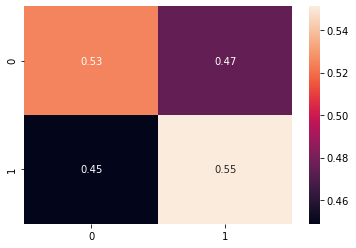

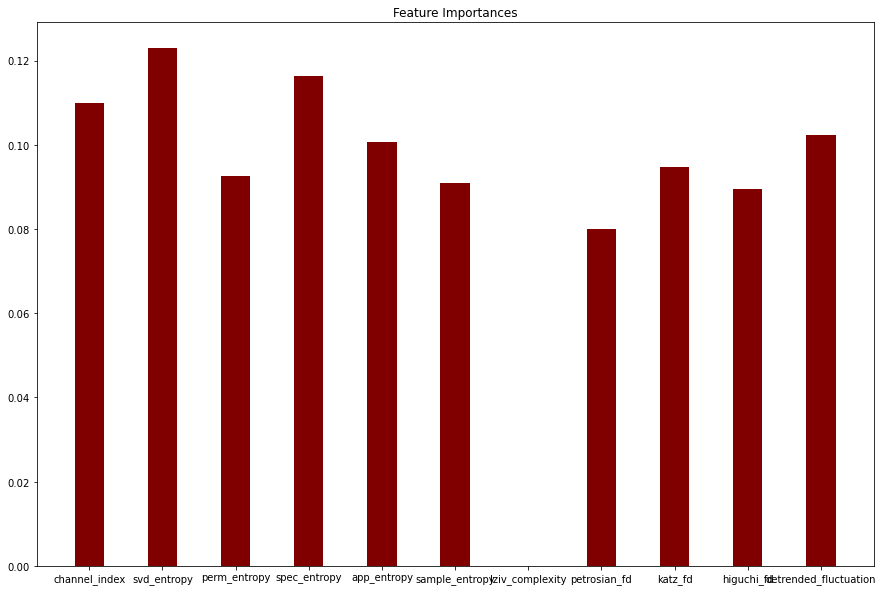

In [748]:
# import numpy as np
import pandas as pd
import umap ###install with "pip install umap-learn"
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns ### install using pip install seaborn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


class complete_dataset:
    # demo loads, manipulates, and analyzes a given dataset
    def __init__(self, csv):
        #csv =df  #pd.read_csv(csv)
        ###df=pd.DataFrame(csv)
        #csv = numpy.array() 
        #self.target = df.iloc[:, 2] #Getting rid of 'condition' and 'time' as columns since both are main predictors typically put as cols 1&2
        ###self.target =  pd.DataFrame(df.iloc[:, 2])
        #self.data = df.iloc[:, 2:]
        #####self.data =  pd.DataFrame(df.iloc[:, 2:])
        #print(type(self.target))
        self.data = csv.drop(['time','condition'], axis=1) 
        self.target = csv['condition']    
        print(type(self.data))
        print(type(self.target))
        #y = pd.DataFrame(data)
# dataset = combined_dataframe

#data = dataset.drop(['time','condition'], axis=1)
#X = dataset.drop(['time', 'condition'], axis=1)
#print(X)
#print(X.shape)
#labels = dataset['condition']               

    # Define methods
    def scale(self):
        # We don't expect our data to be Gaussian, so let's use normalization
        min_val = self.data.min().min()
        max_val = self.data.max().max()
        self.data = (self.data - min_val) / (max_val - min_val)
        return self.data

    def umap(self):
        # Use UMAP for dimensionality reduction
        self.reducer = umap.UMAP().fit(self.data)
        self.data = pd.DataFrame(self.reducer.transform(self.data))
        return self.reducer

    def kmeans(self, k):
        self.kmeansfit = KMeans(n_clusters=k).fit(self.data)
        self._kmeans_dict()
        return self.kmeansfit
    
    def _kmeans_dict(self):
        self._kmeansdict = dict()
        for i in range(self.kmeansfit.n_clusters):
            index = [ind for ind in range(len(self.kmeansfit.labels_)) if self.kmeansfit.labels_[ind] == i]
            actual_labels = [self.target[ind] for ind in index]
            max_count = -1
            for l in set(actual_labels):
                count = actual_labels.count(l)
                if count > max_count:
                    most_common = l
                    max_count = count
            self._kmeansdict[i] = most_common
    
    def translate_kmeans(self, labels):
        return [self._kmeansdict[l] for l in labels]
    
    def svm(self, kern='rbf'):
        self.svmfit = SVC(kernel=kern).fit(self.data, self.target)
        return self.svmfit
    
    def cross_val(self, model, data, n):
        return cross_val_score(model, data, self.target, cv=n)
    
    
    def svm2(self, kern='linear', splits=5):
        svmfit = SVC(kernel=kern).fit(self.data.values, self.target.values)
        skf = StratifiedKFold(n_splits=splits)
        accuracy = 0
        for train_index, test_index in skf.split(self.data.values, self.target.values):
            X_train, y_train = self.data.values[train_index], self.target.values[train_index] #''' training dataset '''
            X_test, y_test = self.data.values[test_index], self.target.values[test_index] #''' testing dataset '''
            svm_model.fit(X_train,y_train)
            predictions = svm_model.predict(X_test)
            accuracy += accuracy_score(predictions,y_test)
        
        
        return accuracy/splits
        
        
    def rand_for(self, n_est = 25, crit = 'gini', splits=5):
        rf_model = RandomForestClassifier(n_estimators = n_est,  criterion=crit)
        skf = StratifiedKFold(n_splits=splits)
        accuracy = 0
        all_feature_importances = np.zeros(11) #len(self.data.columns)
        all_labels = []
        all_predictions = []
        for train_index, test_index in skf.split(self.data.values, self.target.values): 
            X_train, y_train = self.data.values[train_index], self.target.values[train_index]    #''' training dataset '''
            X_test, y_test = self.data.values[test_index], self.target.values[test_index]
            rf_model.fit(X_train,y_train)
            #''' add the new feature importances to the current FI vlues'''
            all_feature_importances += rf_model.feature_importances_
            predictions = rf_model.predict(X_test)
            #''' Use extend function to add the new predictions onto thelist of predictions'''
            all_predictions.extend(predictions)        
            #''' Use extend function to add the new labels onto the list of labels'''
            all_labels.extend(y_test)
            accuracy += accuracy_score(predictions,y_test)
            #return accuracy/5
            
        cm = confusion_matrix(all_labels,all_predictions,normalize= 'true')#here, I input the labels and predictions into the Scikit learn confusion_matrix function and theywill generate a confusion matrix for me
        df_cm = pd.DataFrame(cm,index=[0,1],columns=[0,1])#turn it into a dataframe so seaborn will label the graph using the columns/indicies of the df'''
        sns.heatmap(df_cm, annot=True)#graph using seaborn heatmap function - annot=True so labels will appear'''
        #'' now, I will plot the feature importances so we can decide
        #what to do based on our excellent accuracy!'''
        plt.figure(figsize = (15,10))#make the figure a little bigger '''
        #''' use matplotlib's bar graph function to graph feature importances
        #X axis = feature name
        #y axis = feature importance values
        #'''
        plt.bar(list(self.data.columns),all_feature_importances/splits, color ='maroon',  width = 0.4) 
        plt.title('Feature Importances')
        return accuracy/splits #, print(), print('ALL LABELS'), print(all_labels), print(), print('ALL PREDICTIONS'), print(all_predictions)


    def grid_search(self, n_est = 25, crit = 'gini'):
        rf_model = RandomForestClassifier(n_estimators = n_est,  criterion=crit)
        parameters = {'n_estimators':(25, 50,75,100,120,1000), 'criterion':['gini', 'entropy']}
        self.clf = GridSearchCV(rf_model, parameters)
        self.clf.fit(dataset.values,labels)     # HAS NO VALUES OR LABELS HERE!!!!
        return clf.best_params_, clf.best_score_ 
       
    def visualize_2d(self):
        # And we can visualize the umap results, color coded by what the actual digit is
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        color = self.umap().astype(int) 
        ax1.scatter(self.umap().iloc[:, 0], self.umap().iloc[:, 1], c=color, cmap="hsv", s=0.1)
        ax1.set_title("Scaled MNIST data embedded into two dimensions by UMAP", fontsize=13)
        plt.show()
        #color = noscale_demo.target.astype(int) 
        #ax2.scatter(noscale_demo.data.iloc[:, 0], noscale_demo.data.iloc[:, 1], c=color, cmap="hsv", s=0.1)
        #ax2.set_title("Unscaled MNIST data embedded into two dimensions by UMAP", fontsize=13)
        return print('aaa')

#    def conf_table()

        
########    
data1 = complete_dataset(combined_dataframe)
print(type(data1))
#print(data1.target)
#print(data1.data)

#####scaled_data = data1.scale()
#print(scaled_data)

#dimred = data1.umap()
#print(dimred)

#svm = data1.svm()
#print(svm)

svvmm = data1.svm2(splits=5)
print(svvmm)

#a = data1.visualize_2d()
#print(a)

#gs = data1.grid_search()
#print(gs)

rf = data1.rand_for()
print(rf)

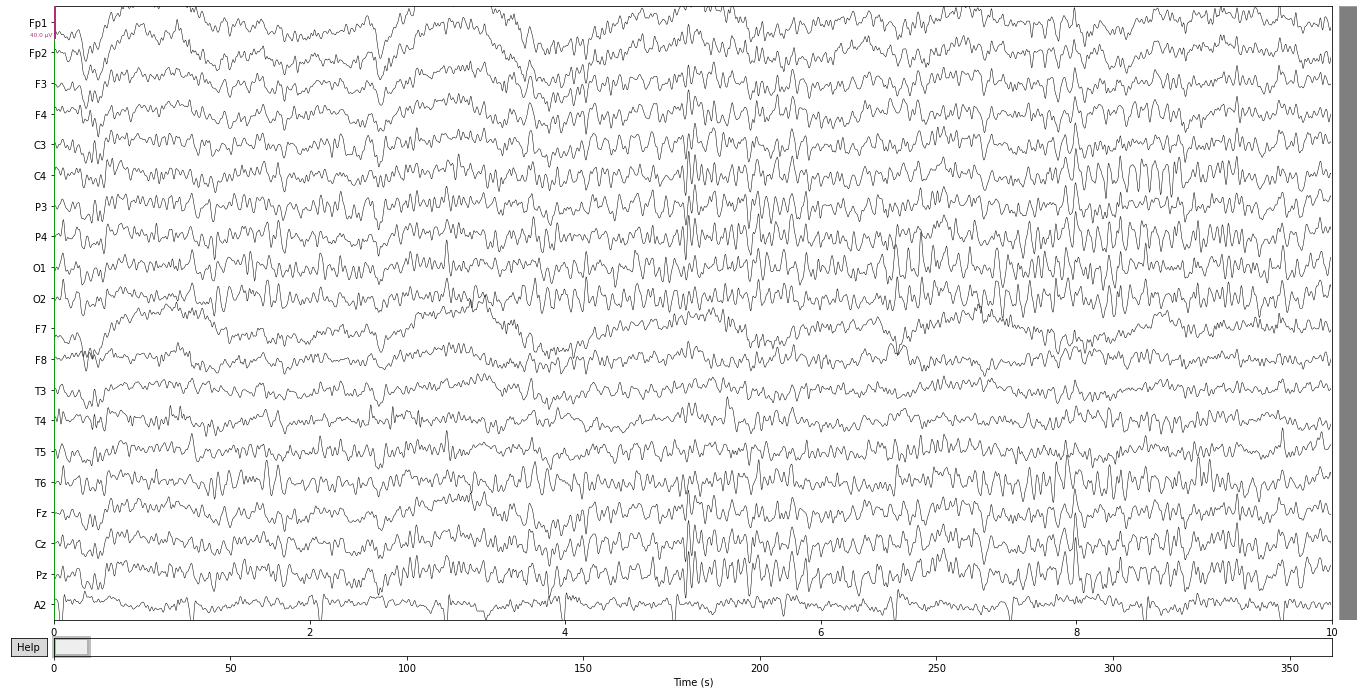

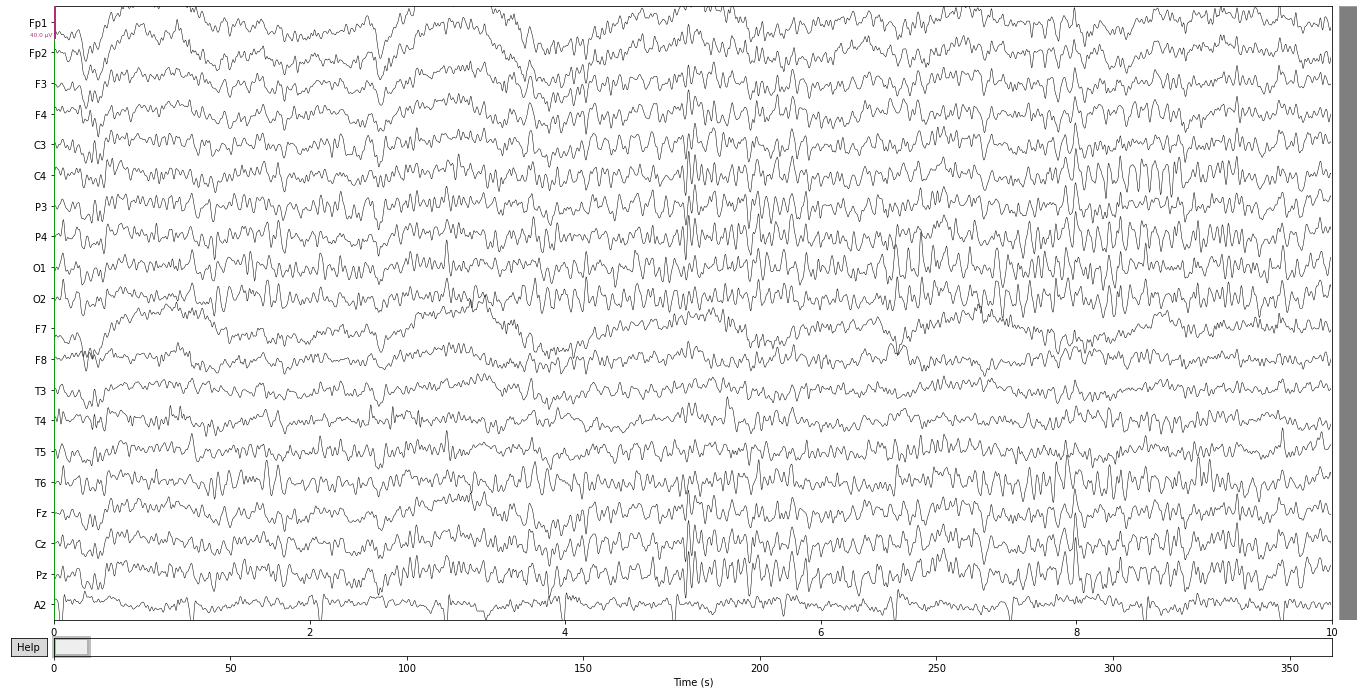

In [762]:
#%matplotlib qt
#%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib tk
#INDICIES FOR CHANNELS: 5=C3, 6=C4,7=P3,  8=P4, Fz=17, Cz=18, Pz=19
raw.plot()